<a href="https://colab.research.google.com/github/SaravanaIyyappan/SPEX/blob/main/final_code(redused).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Oct 20 09:28:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="H8LfpbY8zlbtS1OUc131")
project = rf.workspace("intern-spzzm").project("main-dataset-u24yj")
dataset = project.version(7).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to main-dataset-7 in yolov8:: 100%|██████████| 616/616 [00:00<00:00, 2015.54it/s]


## Custom Training

In [ ]:


!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/main-dataset-7/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

In [6]:
!ls /content/runs/detect/train2/

args.yaml					    results.csv		train_batch2.jpg
confusion_matrix.png				    results.png		val_batch0_labels.jpg
events.out.tfevents.1697793209.c38e10e5bcad.1778.0  train_batch0.jpg	val_batch0_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch1_labels.jpg
P_curve.png					    train_batch225.jpg	val_batch1_pred.jpg
PR_curve.png					    train_batch226.jpg	weights
R_curve.png					    train_batch227.jpg


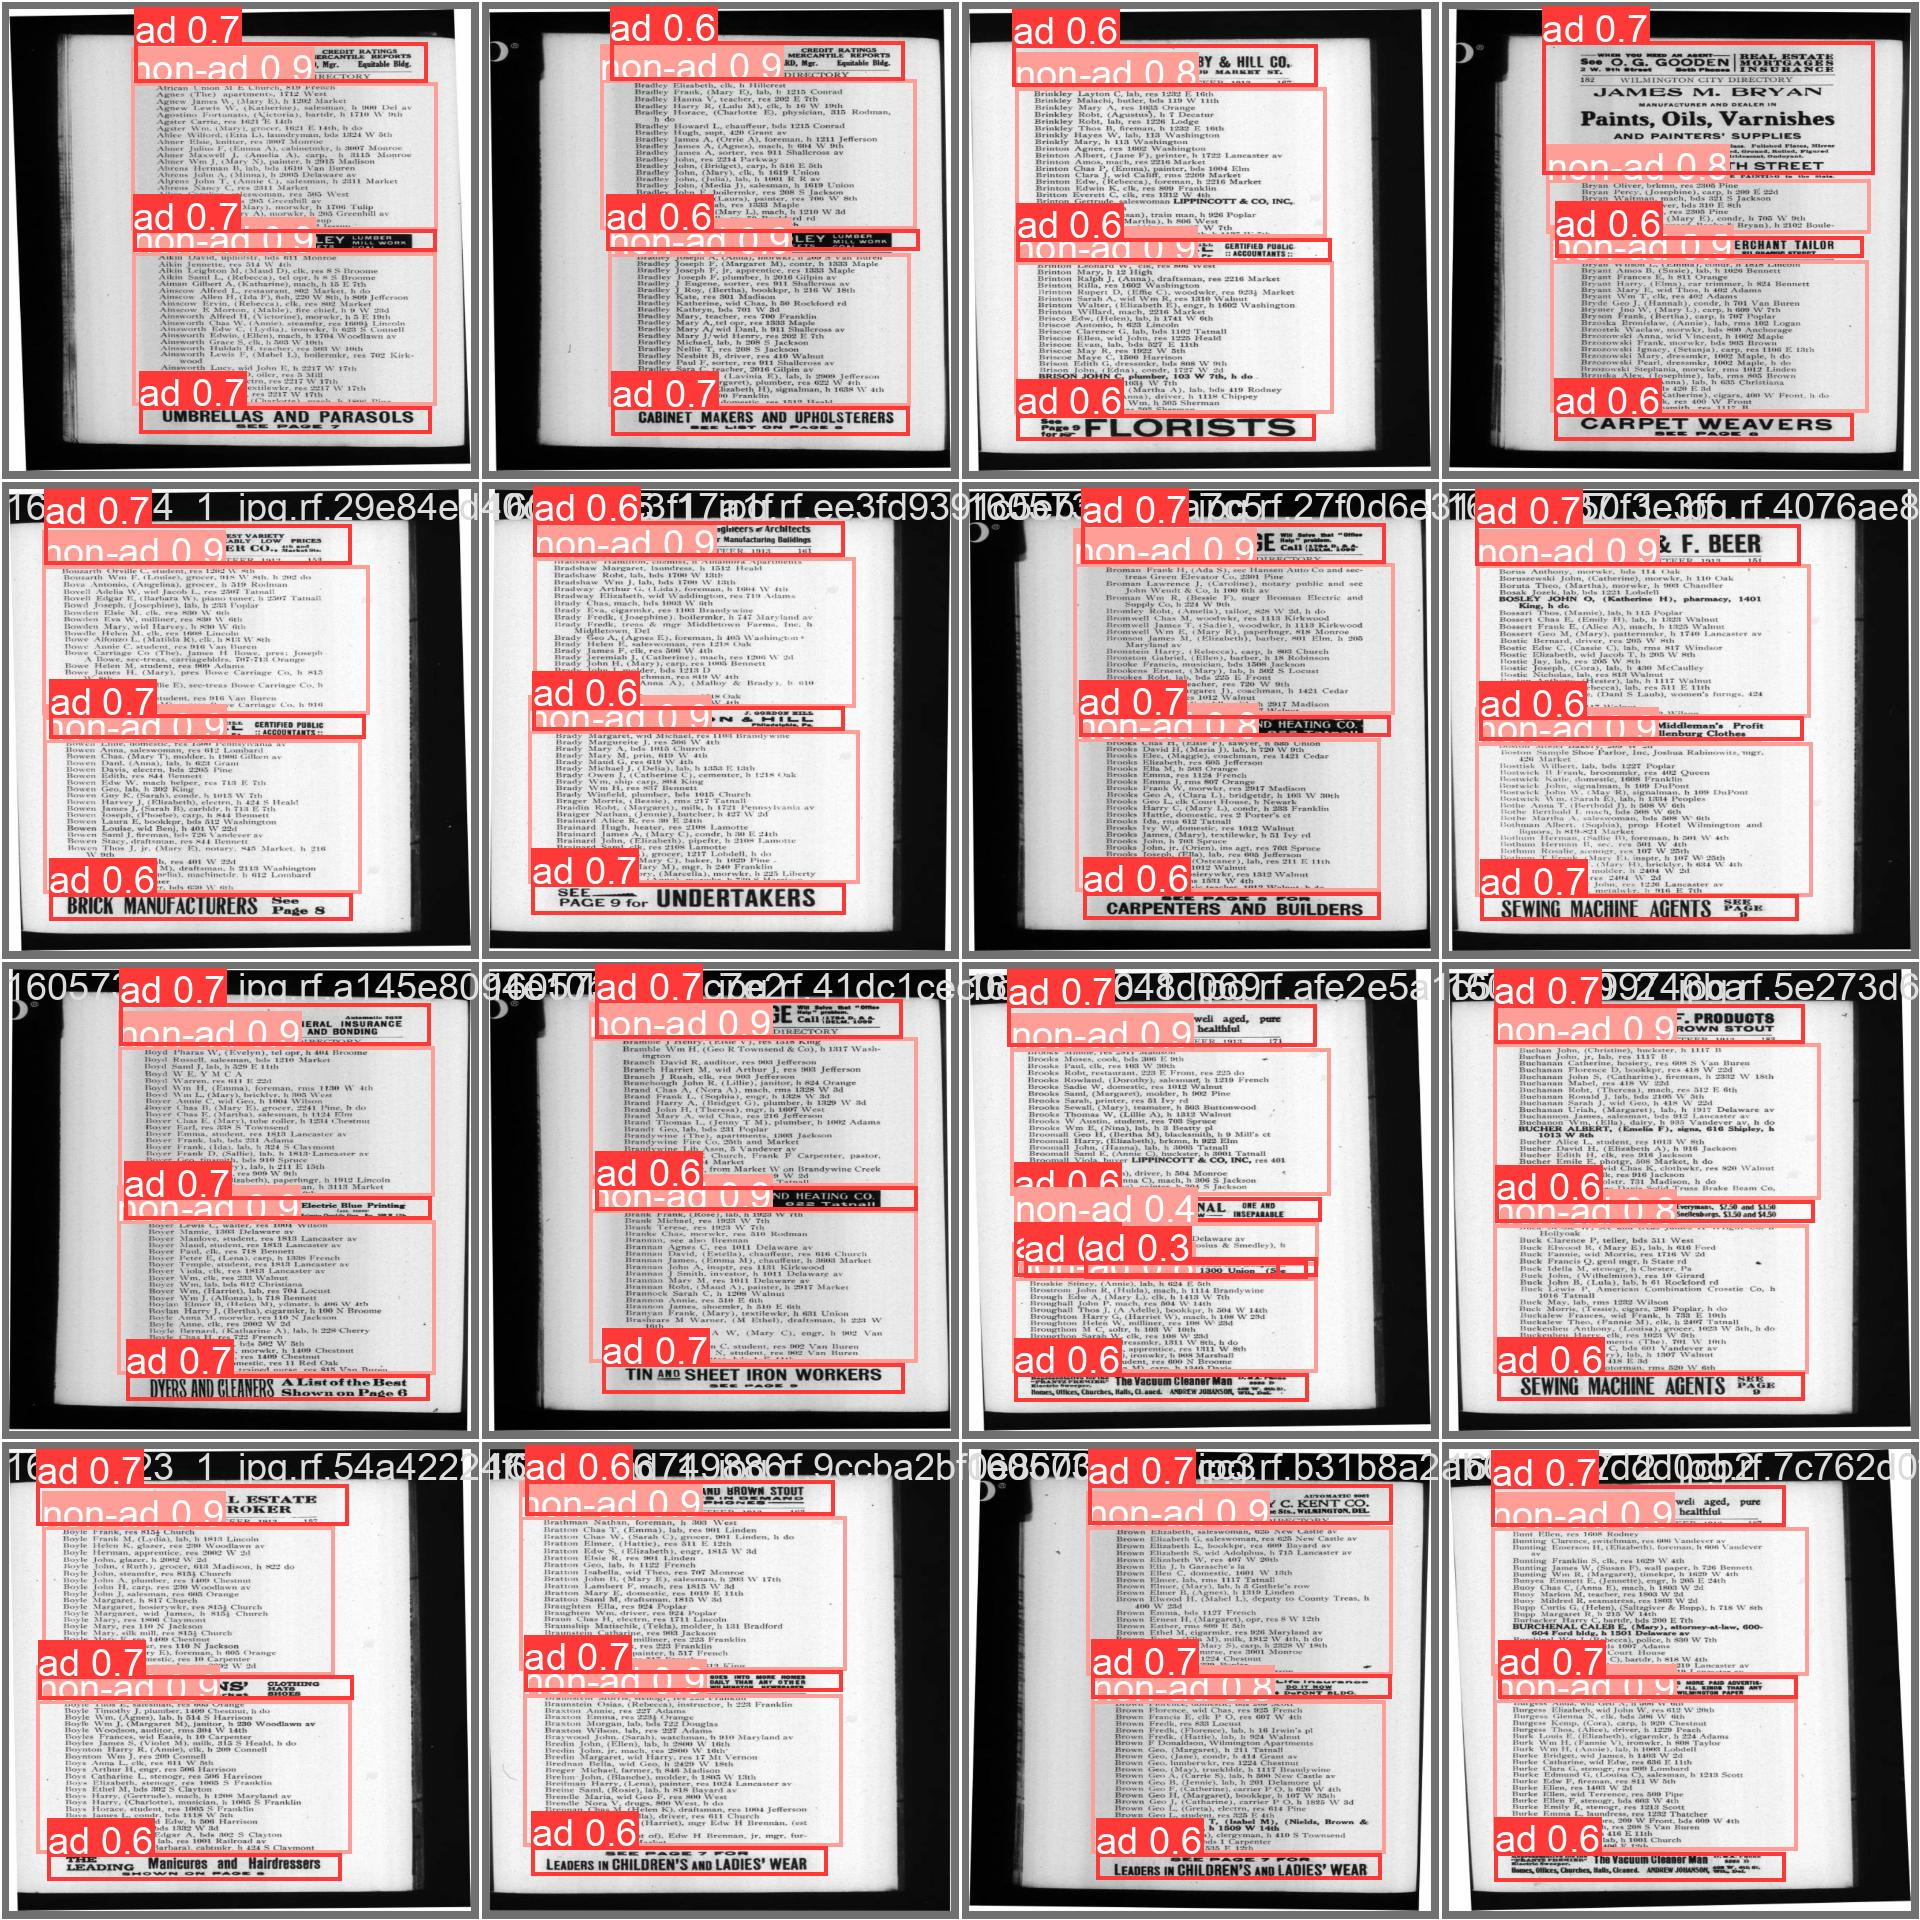

In [7]:

Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [8]:


!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

2023-10-20 09:29:14.243774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 09:29:15.517632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*a

## Inference with Custom Model

In [9]:

!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

2023-10-20 09:29:30.765000: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 09:29:32.004612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/14 /content/main-dataset-7/test/images/16057281_2_jpg.rf.4fd5adfc6c8d05c80c3fbfd28db5f46b.jpg: 800x800 5 ads, 2 non-ads, 24.7ms
image 2/14 /content/main-dataset-7/test/images/16057282_1_jpg.rf.d98c30737d0c336d5c1d51f3caac4355.jpg: 800x800 3 ads, 2 non-ads, 24.7ms
image 3/14 /content/main-dataset-7/test/images/16057287_2_jpg.rf.5be0915c395d1ca29d5f0e1421760862.jpg: 800x800 3 ads, 2 non-

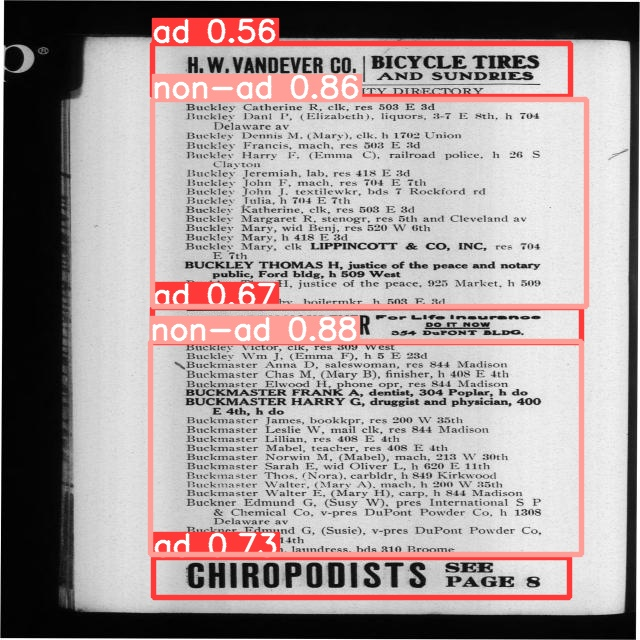

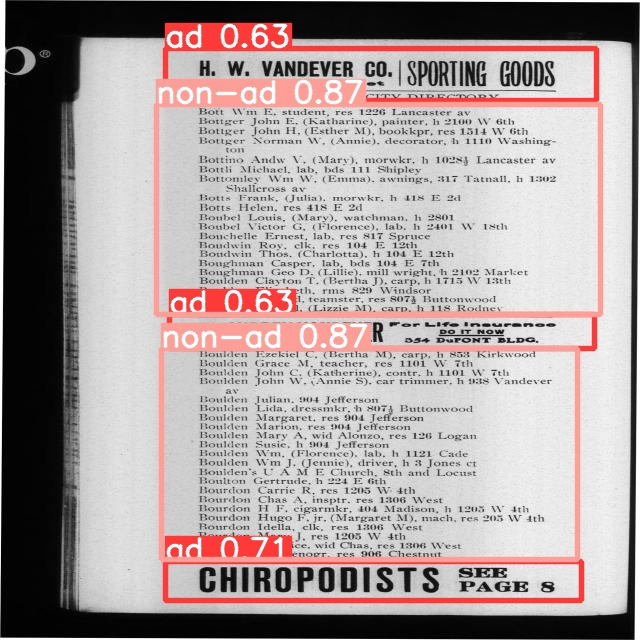

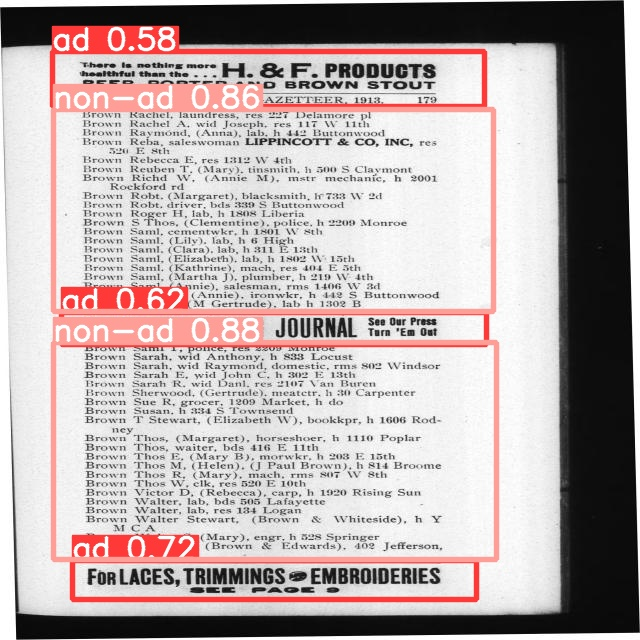

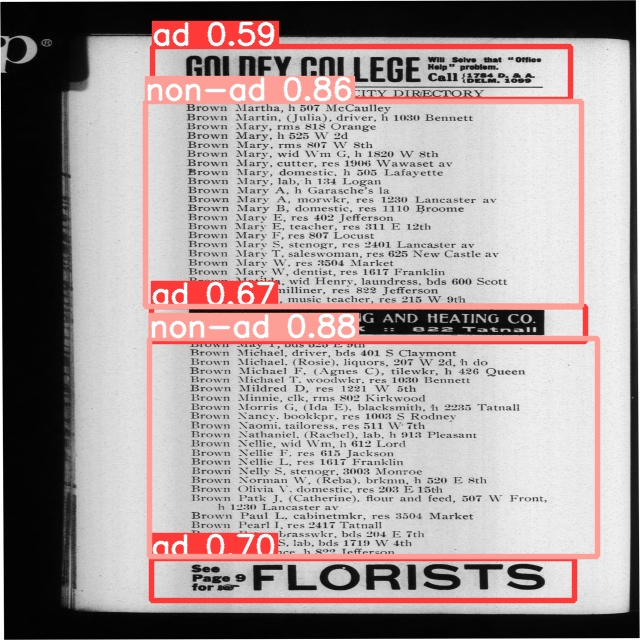

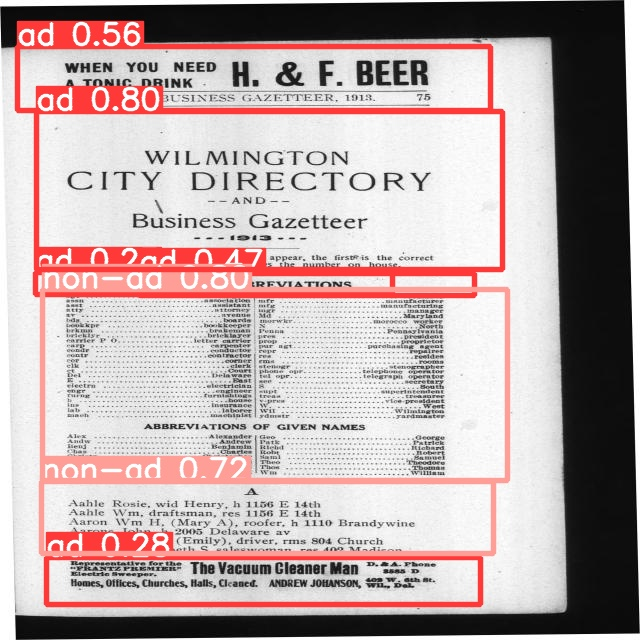

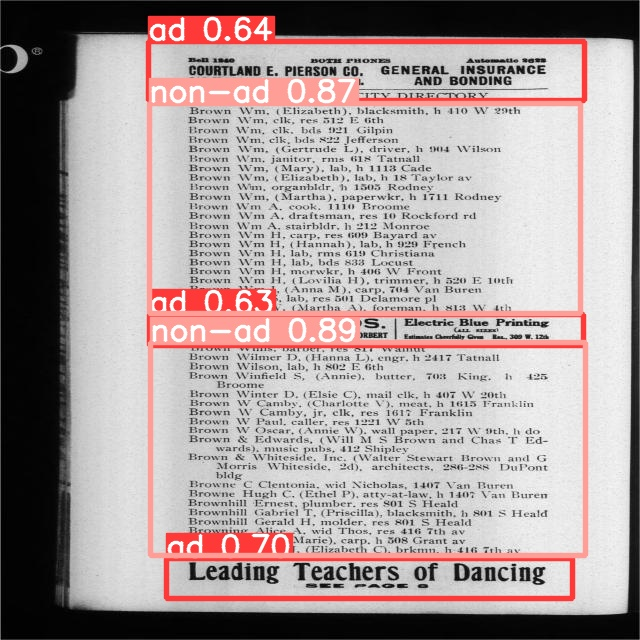

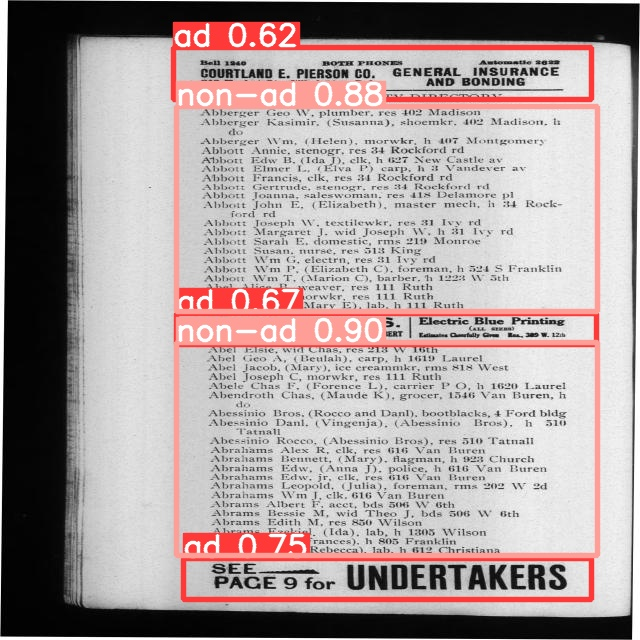

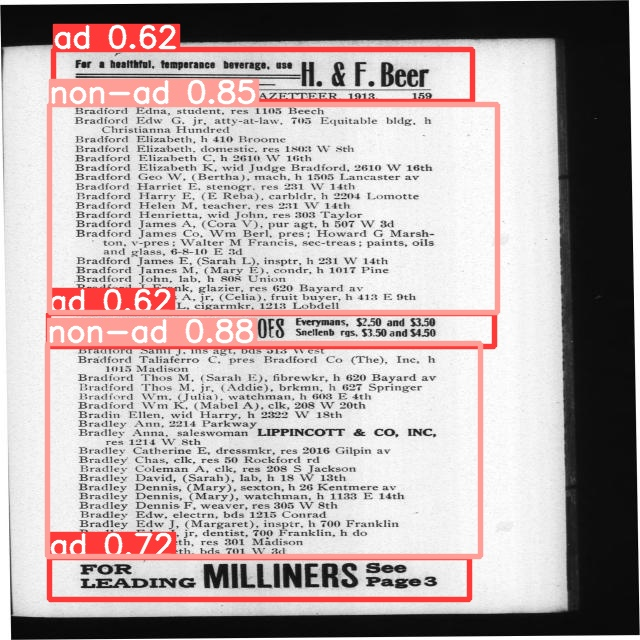

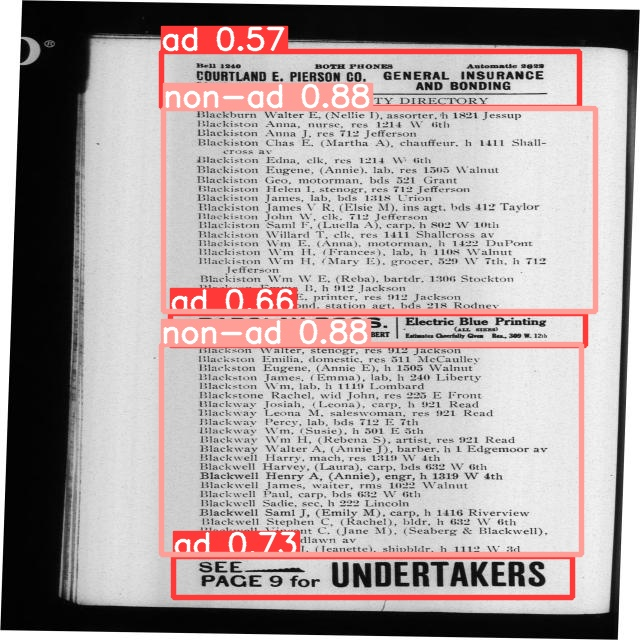

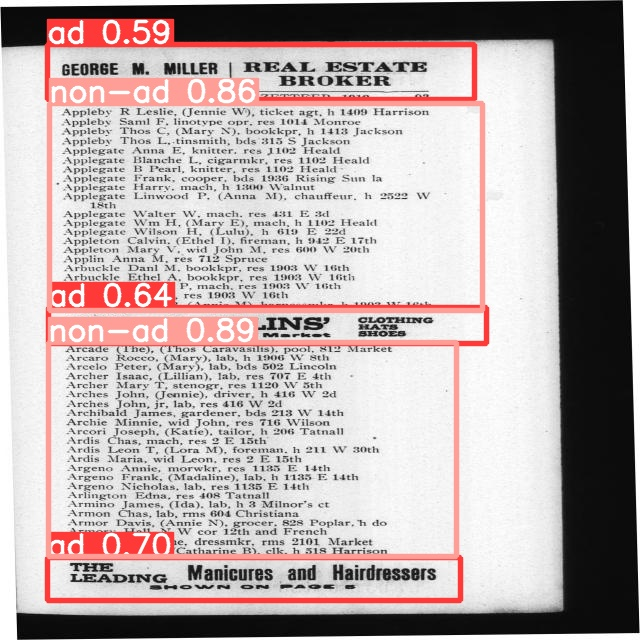

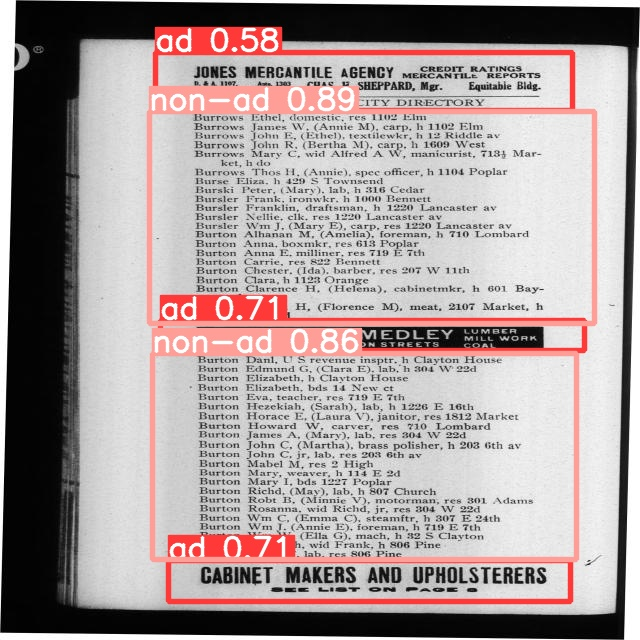

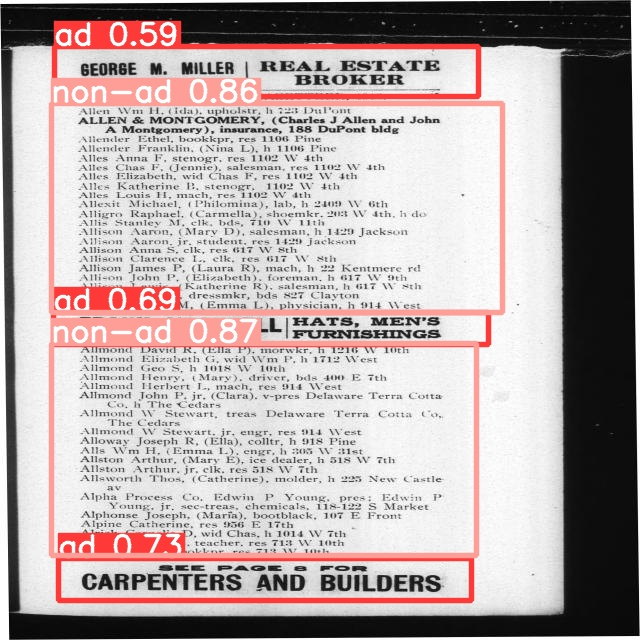

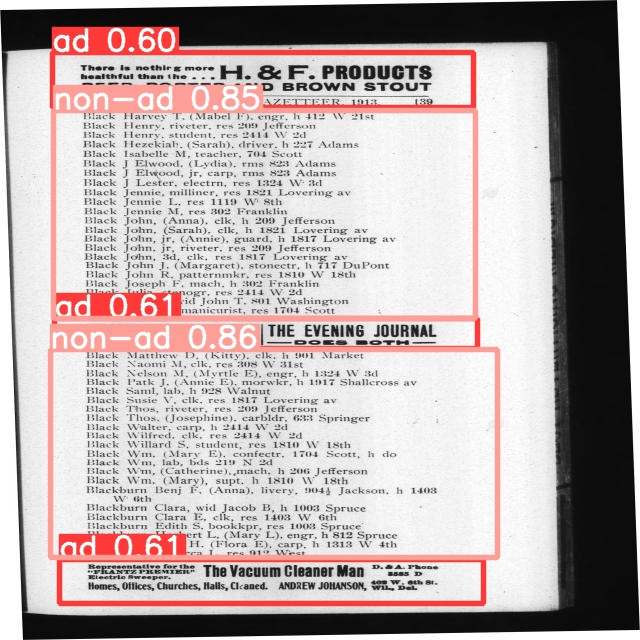

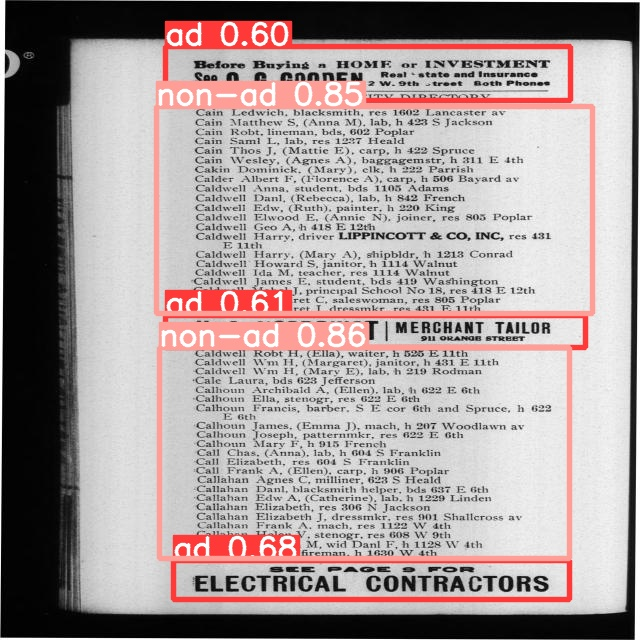

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

# **Input Image Path **

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source='/content/photo' save=True

2023-10-20 09:29:43.290327: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 09:29:44.526969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/5 /content/photo/16057283_1.jpg: 800x544 3 ads, 2 non-ads, 75.5ms
image 2/5 /content/photo/16057283_2.jpg: 800x544 3 ads, 2 non-ads, 18.8ms
image 3/5 /content/photo/16057284_1.jpg: 800x544 3 ads, 2 non-ads, 18.8ms
image 4/5 /content/photo/16057284_2.jpg: 800x544 3 ads, 2 non-ads, 18.8ms
image 5/5 /content/photo/16057285_1.jpg: 800x544 3 ads, 2 non-ads, 18.8ms
Speed: 0.7ms pre-process, 